In [1]:
import re
import json
from collections import defaultdict
from nltk.tokenize import RegexpTokenizer
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
regex = re.compile(r"\n(\d+[A-Z]?)[^\.]?\n(.+?)(?=\n\d+[A-Z]?[^\.]?\n?)", re.MULTILINE | re.DOTALL| re.UNICODE)

In [3]:
tokenizer = RegexpTokenizer(r'(\w+[-|\']?\w*)')

In [4]:
def script_to_secnens_dict(file_name):
    script = open(file_name,"r").read().decode("utf-8")
    scenes = defaultdict(str)
    matches = regex.finditer(script)
    for match in matches:
        sceneId = match.group(1)
        dialog = match.group(2)
        scenes[sceneId] += dialog
    return scenes

In [5]:
def save_as_json(data, file_name):
    with open("../movieScripts/processed/" + file_name + ".json", 'w') as f:
        f.write(json.dumps(data))

In [6]:
files = [
    "../movieScripts/(2)_Harry_Potter_and_the_Chamber_of_Secrets.txt"
]

In [7]:
for script in files:
    #save_as_json(script_to_secnens_dict(script), script.split("/")[-1].split(".")[0])
    pass

In [8]:
"the trio"
"arthur weasley's daughter"

"arthur weasley's daughter"

In [9]:
with open('nameDict.json') as json_file:  
    name_mappings = json.load(json_file, encoding="utf-8")

In [10]:
with open("../movieScripts/(2)_Harry_Potter_and_the_Chamber_of_Secrets.txt") as f:
        script = f.read()

In [11]:
ignore=["fluffy", "tufty", "gryffindor"]

In [12]:
special_cases = {
    "WOOD":"oliver wood", 
    "oliver wood":"oliver wood", 
    "mrs. weasley": "molly weasley", 
    "mr. weasley": "arthur weasley",
    "arthur weasley's daughter": "ginny weasley"
}

In [13]:
occurences = defaultdict(set)
scenes = script.split("_START OF NEW SCENE_")[1:]

for index, scene in enumerate(scenes):
    text = scene.lower()
    tokens = tokenizer.tokenize(text)
    
    for key, name in special_cases.iteritems():
        if key in scene:
            occurences[index].add(special_cases[key])
    
    for token in tokens:
        if token in ignore:
            continue
        if name_mappings.has_key(token):
            occurences[index].add(name_mappings[token][0])

In [14]:
idx = 125
#print occurences[idx], scenes[idx]

In [15]:
for s,c in occurences.iteritems():
    if "mr. mason" in c:
        pass
        #print "found", scenes[s]

In [16]:
G = nx.Graph()

In [17]:
for scene, characters in occurences.iteritems():
    for character in characters:
        G.add_node(character)
        for other in characters:
            if character != other:
                G.add_edge(character, other)
    

In [18]:
subgraphs = list(nx.connected_component_subgraphs(G))

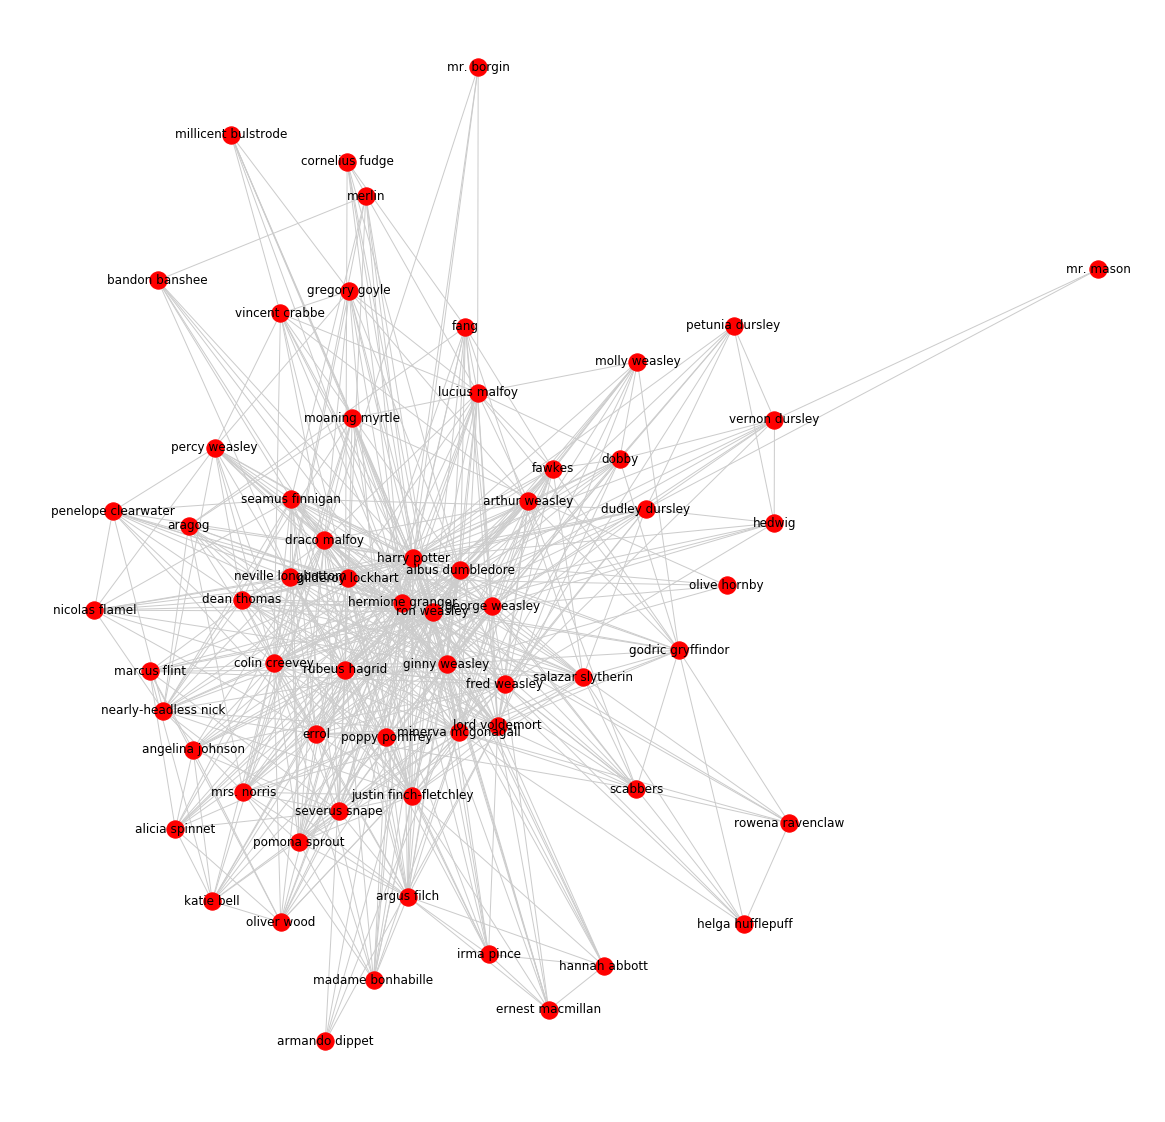

In [23]:
plt.figure(figsize=(20,20))
plt.axis("off")
nx.draw_networkx(subgraphs[0], with_labels=True, edge_color="#cccccc")

In [20]:
list(nx.all_neighbors(G, "dudley dursley"))

[u'hermione granger',
 u'seamus finnigan',
 u'harry potter',
 u'ginny weasley',
 u'hedwig',
 u'george weasley',
 u'mr. mason',
 u'dean thomas',
 u'petunia dursley',
 u'justin finch-fletchley',
 u'vernon dursley',
 u'fred weasley',
 u'ron weasley',
 u'neville longbottom',
 u'salazar slytherin']